In [107]:
import sys
import traceback
from arduino_iot_cloud import ArduinoCloudClient
import asyncio
from datetime import datetime

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import dash
from dash.dependencies import Input, Output
from dash import dcc, html
import time

In [108]:
DEVICE_ID = "d2d8a108-d4c3-4794-bf15-271885269210"
SECRET_KEY = "YyuZ6b3CQZHTJC#TGX@@H7AiP"

In [109]:
arduino = ArduinoCloudClient(
            device_id=DEVICE_ID, username=DEVICE_ID, password=SECRET_KEY
        )

In [110]:
# 2 buffer data one for temporary and the one for plotting
buffer_data = []
plot_data = []

In [111]:
# Plotly dash
# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    dcc.Graph(id='update-graph'),
    dcc.Interval(id='interval-component', interval=1000, n_intervals=0)  
])

@app.callback(
    Output('update-graph', 'figure'),
    Input('interval-component', 'n_intervals')
)
def update_graph(n_intervals):
    global plot_data
    # Convert the current data to a DataFrame
    df = pd.DataFrame(plot_data, columns=['index', 'Timestamp', 'X', 'Y', 'Z'])
    
    # Create a line plot with Plotly Express
    figure = px.line(df, x='Timestamp', y=['X', 'Y', 'Z'], title='Accelerometer Data using SmartPhone')
    
    return figure

In [112]:
app.run_server(debug_mode = True, jupyter_tab = True)

In [151]:
x, y, z = 0, 0, 0
time = 0
num_threshold = 10

def on_x_changed(client, value):
    global x
    x = value
def on_y_changed(client, value):
    global y
    y = value
def on_z_changed(client, value):
    global z
    z = value
if __name__ == "__main__":    
    client = ArduinoCloudClient(device_id=DEVICE_ID, username=DEVICE_ID, 
                                password=SECRET_KEY, sync_mode = True)
    # Register the callback functions
    client.register("x", value=None, on_write=on_x_changed)
    client.register("y", value=None, on_write=on_y_changed)
    client.register("z", value=None, on_write=on_z_changed)
    client.start()

    while True:
        # Check if all the variables x y and z are all recorded
        if (x is not None ) and (y is not None) and (z is  not None) :
            if time < num_threshold :
                
                time = time + 1
                current_timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
                buffer_data.append([time, current_timestamp, x,y,z])
                # Print out to check the number of times the data has been recorded
                print([time,current_timestamp,x,y,z])

                # Set x,y,z back to None
                x, y, z = None, None, None
            else : 
                current_timestamp = datetime.now()
                format_time = current_timestamp.strftime('%Y-%m-%d-%H-%M-%S')
                df = pd.DataFrame(buffer_data, 
                                  columns=['Index','Timestamp', 'X_Acce', 'Y_Acce', 'Z_Acce'])
                filename = f"csv_{format_time}.csv"
                df.to_csv(filename)

                # Reset the time to 0 becasue it has reached the defined threshold
                time = 0
                plot_data = buffer_data.copy()

                # Clear the buffer data for the next time usage
                buffer_data.clear()
        client.update()

[1, '2024-09-05 13:36:39', 0, 0, 0]
[2, '2024-09-05 13:36:39', 0.0134735107421875, 0.0346221923828125, -1.00335693359375]
[3, '2024-09-05 13:36:40', 0.0043182373046875, 0.05413818359375, -0.999053955078125]
[4, '2024-09-05 13:36:41', -0.0029296875, 0.054351806640625, -0.9996337890625]
[5, '2024-09-05 13:36:42', 0.0146484375, 0.0453948974609375, -0.9985504150390625]
[6, '2024-09-05 13:36:43', 0.0056610107421875, 0.04461669921875, -0.9996490478515625]
[7, '2024-09-05 13:36:44', 0.0093841552734375, 0.040740966796875, -0.9973907470703125]
[8, '2024-09-05 13:36:45', 0.00830078125, 0.0403289794921875, -0.9998626708984375]
[9, '2024-09-05 13:36:46', 0.4925079345703125, 0.1922760009765625, -0.8449249267578125]
[10, '2024-09-05 13:36:47', 0.3591156005859375, 0.2521820068359375, -0.899139404296875]
[1, '2024-09-05 13:36:48', 0.36370849609375, 0.2473602294921875, -0.8879547119140625]
[2, '2024-09-05 13:36:49', 0.369415283203125, 0.283966064453125, -0.875457763671875]
[3, '2024-09-05 13:36:50', 0.

KeyboardInterrupt: 

In [123]:
# Read recorded CSV file
record_df = pd.read_csv("csv_2024-09-05-12-23-36.csv")
record_df

,Unnamed: 0,Index,Timestamp,X_Acce,Y_Acce,Z_Acce
0,0,1,2024-09-05 12:04:59,0.000000,0.000000,0.000000
1,1,2,2024-09-05 12:04:59,0.001022,-0.011246,-1.000183
2,2,3,2024-09-05 12:05:00,0.000809,-0.011078,-0.998886
3,3,4,2024-09-05 12:05:01,-0.027695,0.123444,-1.147537
4,4,5,2024-09-05 12:05:02,-0.472336,-0.384857,-0.318985
...,...,...,...,...,...,...
995,995,996,2024-09-05 12:23:30,0.003296,-0.009781,-1.000153
996,996,997,2024-09-05 12:23:32,0.002762,-0.010239,-0.999359
997,997,998,2024-09-05 12:23:33,0.003098,-0.010010,-1.001007
998,998,999,2024-09-05 12:23:34,0.003952,-0.010376,-0.999588


In [124]:
# Preprocess the data
record_df.drop(columns = ["Unnamed: 0" , "Index"], inplace = True)
record_df

,Timestamp,X_Acce,Y_Acce,Z_Acce
0,2024-09-05 12:04:59,0.000000,0.000000,0.000000
1,2024-09-05 12:04:59,0.001022,-0.011246,-1.000183
2,2024-09-05 12:05:00,0.000809,-0.011078,-0.998886
3,2024-09-05 12:05:01,-0.027695,0.123444,-1.147537
4,2024-09-05 12:05:02,-0.472336,-0.384857,-0.318985
...,...,...,...,...
995,2024-09-05 12:23:30,0.003296,-0.009781,-1.000153
996,2024-09-05 12:23:32,0.002762,-0.010239,-0.999359
997,2024-09-05 12:23:33,0.003098,-0.010010,-1.001007
998,2024-09-05 12:23:34,0.003952,-0.010376,-0.999588


In [125]:
# Convert datetime column
record_df["Timestamp"] =  pd.to_datetime(record_df["Timestamp"])

<Axes: xlabel='Timestamp', ylabel='X_Acce'>

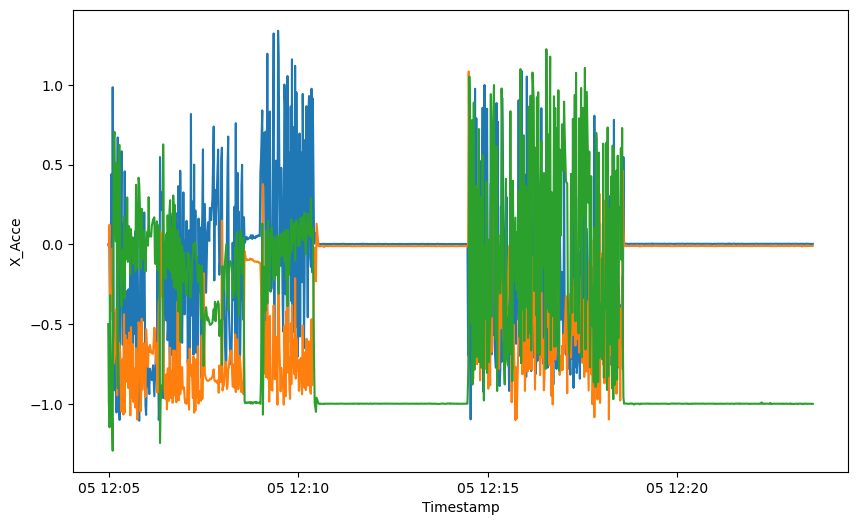

In [126]:
# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(data = record_df , x = "Timestamp" , y = "X_Acce")
sns.lineplot(data = record_df , x = "Timestamp" , y = "Y_Acce")
sns.lineplot(data = record_df , x = "Timestamp" , y = "Z_Acce")

In [127]:
record_df.set_index("Timestamp", inplace = True)

In [130]:
# Trim out the Activity Waving hands
wave_df = record_df.between_time("12:05", "12:11")
wave_df

,X_Acce,Y_Acce,Z_Acce
Timestamp,,,
2024-09-05 12:05:00,0.000809,-0.011078,-0.998886
2024-09-05 12:05:01,-0.027695,0.123444,-1.147537
2024-09-05 12:05:02,-0.472336,-0.384857,-0.318985
2024-09-05 12:05:04,0.440201,-0.417160,-1.021774
2024-09-05 12:05:05,-0.408905,-0.393127,-1.093231
...,...,...,...
2024-09-05 12:10:56,0.003494,-0.011200,-0.999466
2024-09-05 12:10:57,0.003571,-0.011185,-0.999481
2024-09-05 12:10:58,0.003189,-0.010498,-0.999710


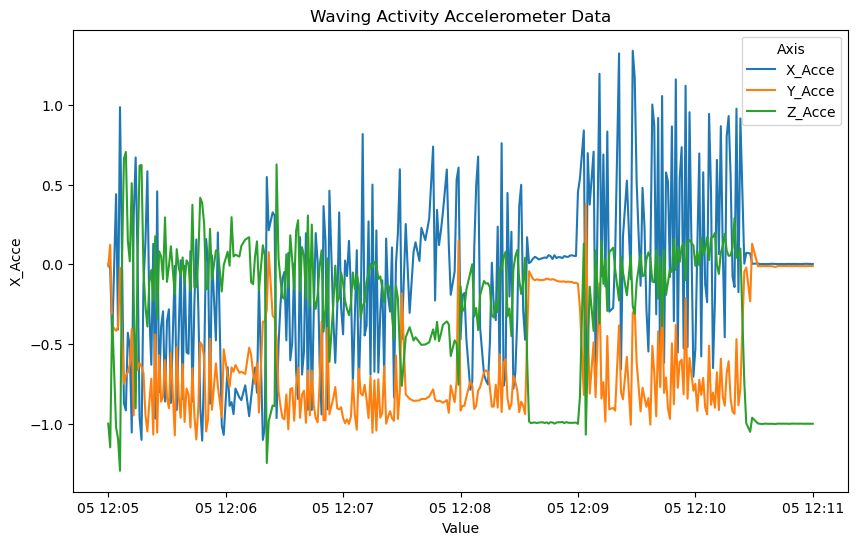

In [146]:
# Plotting
plt.figure(figsize=(10, 6))
plt.title("Waving Activity Accelerometer Data")
plt.xlabel("Value")
sns.lineplot(data = wave_df , x = wave_df.index , y = "X_Acce" , label = 'X_Acce')
sns.lineplot(data = wave_df , x = wave_df.index , y = "Y_Acce",label = 'Y_Acce' )
sns.lineplot(data = wave_df , x = wave_df.index , y = "Z_Acce", label = 'Z_Acce')
plt.legend(title = 'Axis')

In [147]:
wave_df.describe()

,X_Acce,Y_Acce,Z_Acce
count,322.000000,322.000000,322.000000
mean,-0.089307,-0.623730,-0.268986
std,0.528154,0.337876,0.431771
min,-1.105911,-1.098038,-1.294266
25%,-0.492493,-0.888271,-0.477131
50%,0.002144,-0.748695,-0.140160
75%,0.170944,-0.407200,0.047398
max,1.340240,0.378006,0.705276


#### When waving the phone horizontally with its position vertically, the X variable shows the most significant fluctuations because this axis aligns with the direction of our horizontal movement when we move right to left and vice-versa  ranging from $-1.11$ tro $1.34$.

#### The Y variable remains more stable since this axis is oriented vertically and is less influenced by the horizontal waving motion, with values range from $-1.1$ to $0.38$.

#### For the Z variable, it fluctuated moderately with values ranging from $-1.29$ to $0.71$, this is due to phone's vertical orientation and the vertical force components experienced during the horizontal movement.

In [136]:
# Trim out Hold Phone still on surface activity
hold_df = record_df.between_time("12:11", "12:13")
hold_df

,X_Acce,Y_Acce,Z_Acce
Timestamp,,,
2024-09-05 12:11:00,0.002045,-0.010849,-0.999634
2024-09-05 12:11:01,0.002686,-0.010483,-0.999680
2024-09-05 12:11:02,0.003220,-0.010956,-0.998688
2024-09-05 12:11:03,0.002869,-0.010757,-0.999924
2024-09-05 12:11:04,0.002518,-0.011246,-0.999420
...,...,...,...
2024-09-05 12:12:56,0.002914,-0.010818,-1.000031
2024-09-05 12:12:57,0.002457,-0.010635,-0.998917
2024-09-05 12:12:58,0.002975,-0.010468,-0.999130


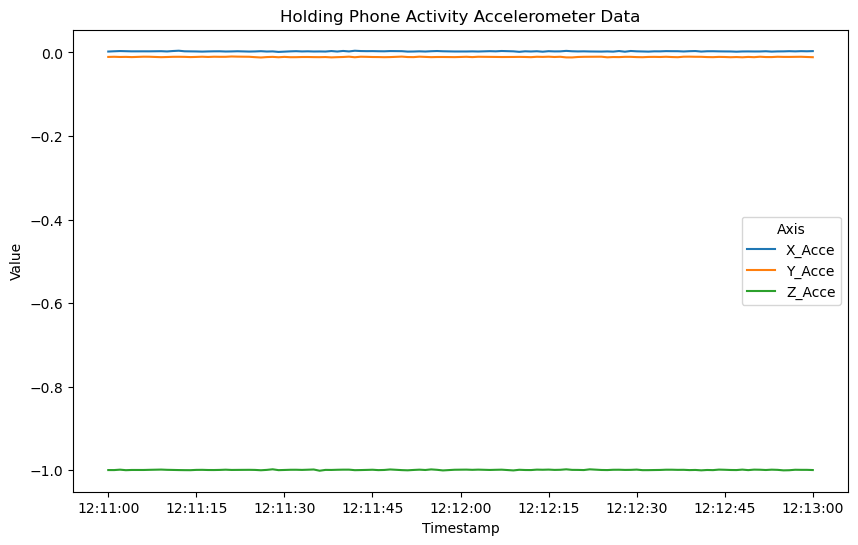

In [148]:
# Plotting
plt.figure(figsize=(10, 6))
plt.title("Holding Phone Activity Accelerometer Data")
plt.ylabel("Value")
sns.lineplot(data = hold_df , x = hold_df.index , y = "X_Acce" , label = 'X_Acce')
sns.lineplot(data = hold_df , x = hold_df.index , y = "Y_Acce" , label = 'Y_Acce')
sns.lineplot(data = hold_df , x = hold_df.index , y = "Z_Acce", label = 'Z_Acce')
plt.legend(title = 'Axis')

In [139]:
hold_df.describe()

,X_Acce,Y_Acce,Z_Acce
count,112.000000,112.000000,112.000000
mean,0.002531,-0.010931,-0.999238
std,0.000501,0.000461,0.000566
min,0.001160,-0.012192,-1.001221
25%,0.002209,-0.011246,-0.999596
50%,0.002502,-0.010956,-0.999268
75%,0.002872,-0.010555,-0.998894
max,0.004013,-0.009796,-0.997803


#### When the phone is placed still on a surface, the accelerometer readings stabilize as expected. The X remains close to zero, indicating minimal movement along this axis, with values around $0.0025$. Furthermore, for Y variable, also stays near zero, with values averaging $-0.011$  reflecting minimal vertical movement.

#### For the Z variable, which remains consistenly at $-1.0$. This stable reading aligns with the expected gravitational pull on the phone when it is held vertically, capturing the vertical force due to gravity

In [140]:
# Trim out the Rotation Activity 
rotate_df = record_df.between_time("12:15", "12:18")
rotate_df

,X_Acce,Y_Acce,Z_Acce
Timestamp,,,
2024-09-05 12:15:00,-0.036102,-0.485123,-0.081039
2024-09-05 12:15:01,-0.427078,-0.905426,0.029892
2024-09-05 12:15:02,-0.331482,-0.576874,-0.738297
2024-09-05 12:15:04,-0.007309,-0.883804,-0.468002
2024-09-05 12:15:05,0.383759,0.196503,0.942581
...,...,...,...
2024-09-05 12:17:56,-0.048553,-0.929016,0.575958
2024-09-05 12:17:57,-0.571930,0.318268,-0.711243
2024-09-05 12:17:58,0.131195,-0.994583,-0.374542


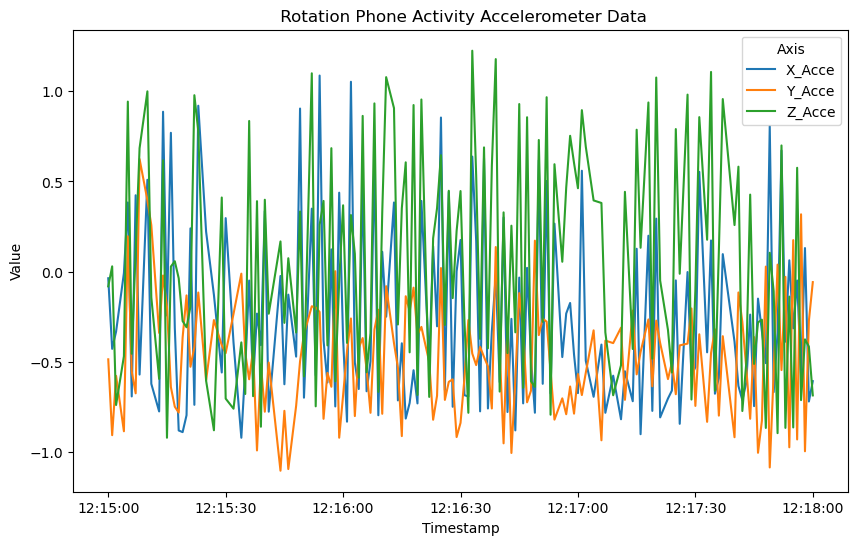

In [149]:
# Plotting
plt.figure(figsize=(10, 6))
plt.title(" Rotation Phone Activity Accelerometer Data")
plt.ylabel("Value")
sns.lineplot(data = rotate_df , x = rotate_df.index , y = "X_Acce", label = 'X_Acce')
sns.lineplot(data = rotate_df , x = rotate_df.index , y = "Y_Acce", label = 'Y_Acce')
sns.lineplot(data = rotate_df , x = rotate_df.index , y = "Z_Acce", label = 'Z_Acce')
plt.legend(title = 'Axis')

In [142]:
rotate_df.describe()

,X_Acce,Y_Acce,Z_Acce
count,155.000000,155.000000,155.000000
mean,-0.252307,-0.473852,0.047857
std,0.507542,0.321925,0.605493
min,-0.919693,-1.102325,-0.919662
25%,-0.672974,-0.709717,-0.474815
50%,-0.403534,-0.496140,0.028763
75%,0.125580,-0.274231,0.583580
max,1.086884,0.624313,1.224472


#### For the Rotating the Phone Activity, all three variables fluctuated significantly. The X shows a broad range from $-0.92$ to $1.09$, reflecting substantial changes in acceleration due to the phone's rotation. Additionally, The Z also flutuates considerably, with values range from $--0.92$ to $1.22$ indicating varying levels of acceleration as the phone rotates.

#### Just like the other two pervios variables, the Y variable also exhitits substaintial fluctuation, with the values range from $-1.1$ to $0.62$. More interestingly, the Y's values seem to remain slow range of values compared to the other 2 variables. 